![New York City schoolbus](schoolbus.jpg)

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

In [12]:
# Re-run this cell 
import pandas as pd

# Read in the data
schools = pd.read_csv("schools.csv")

# Preview the data
schools.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


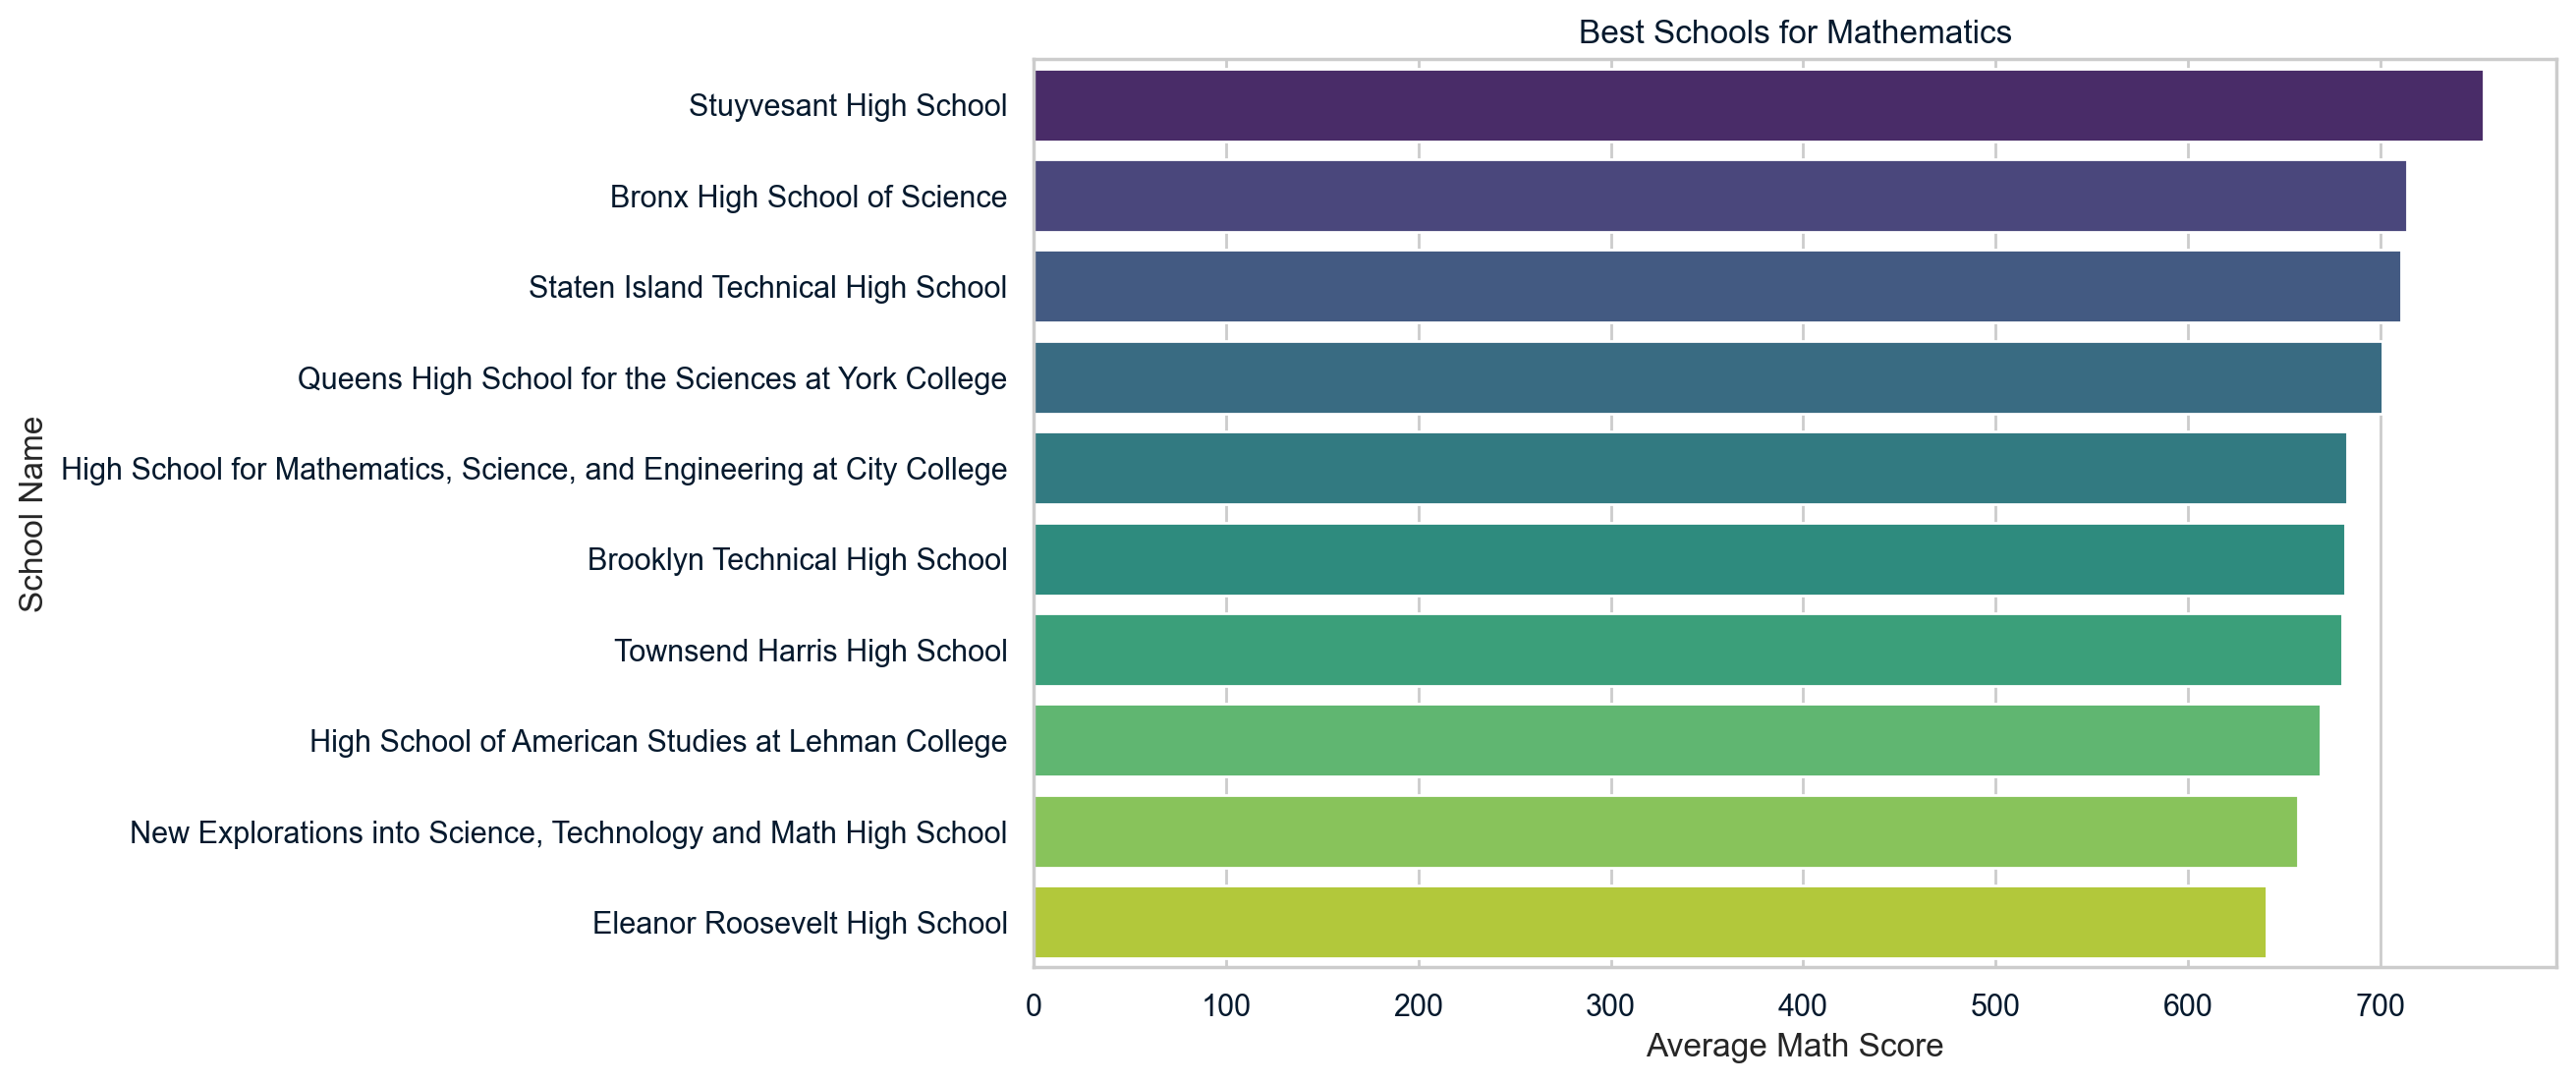

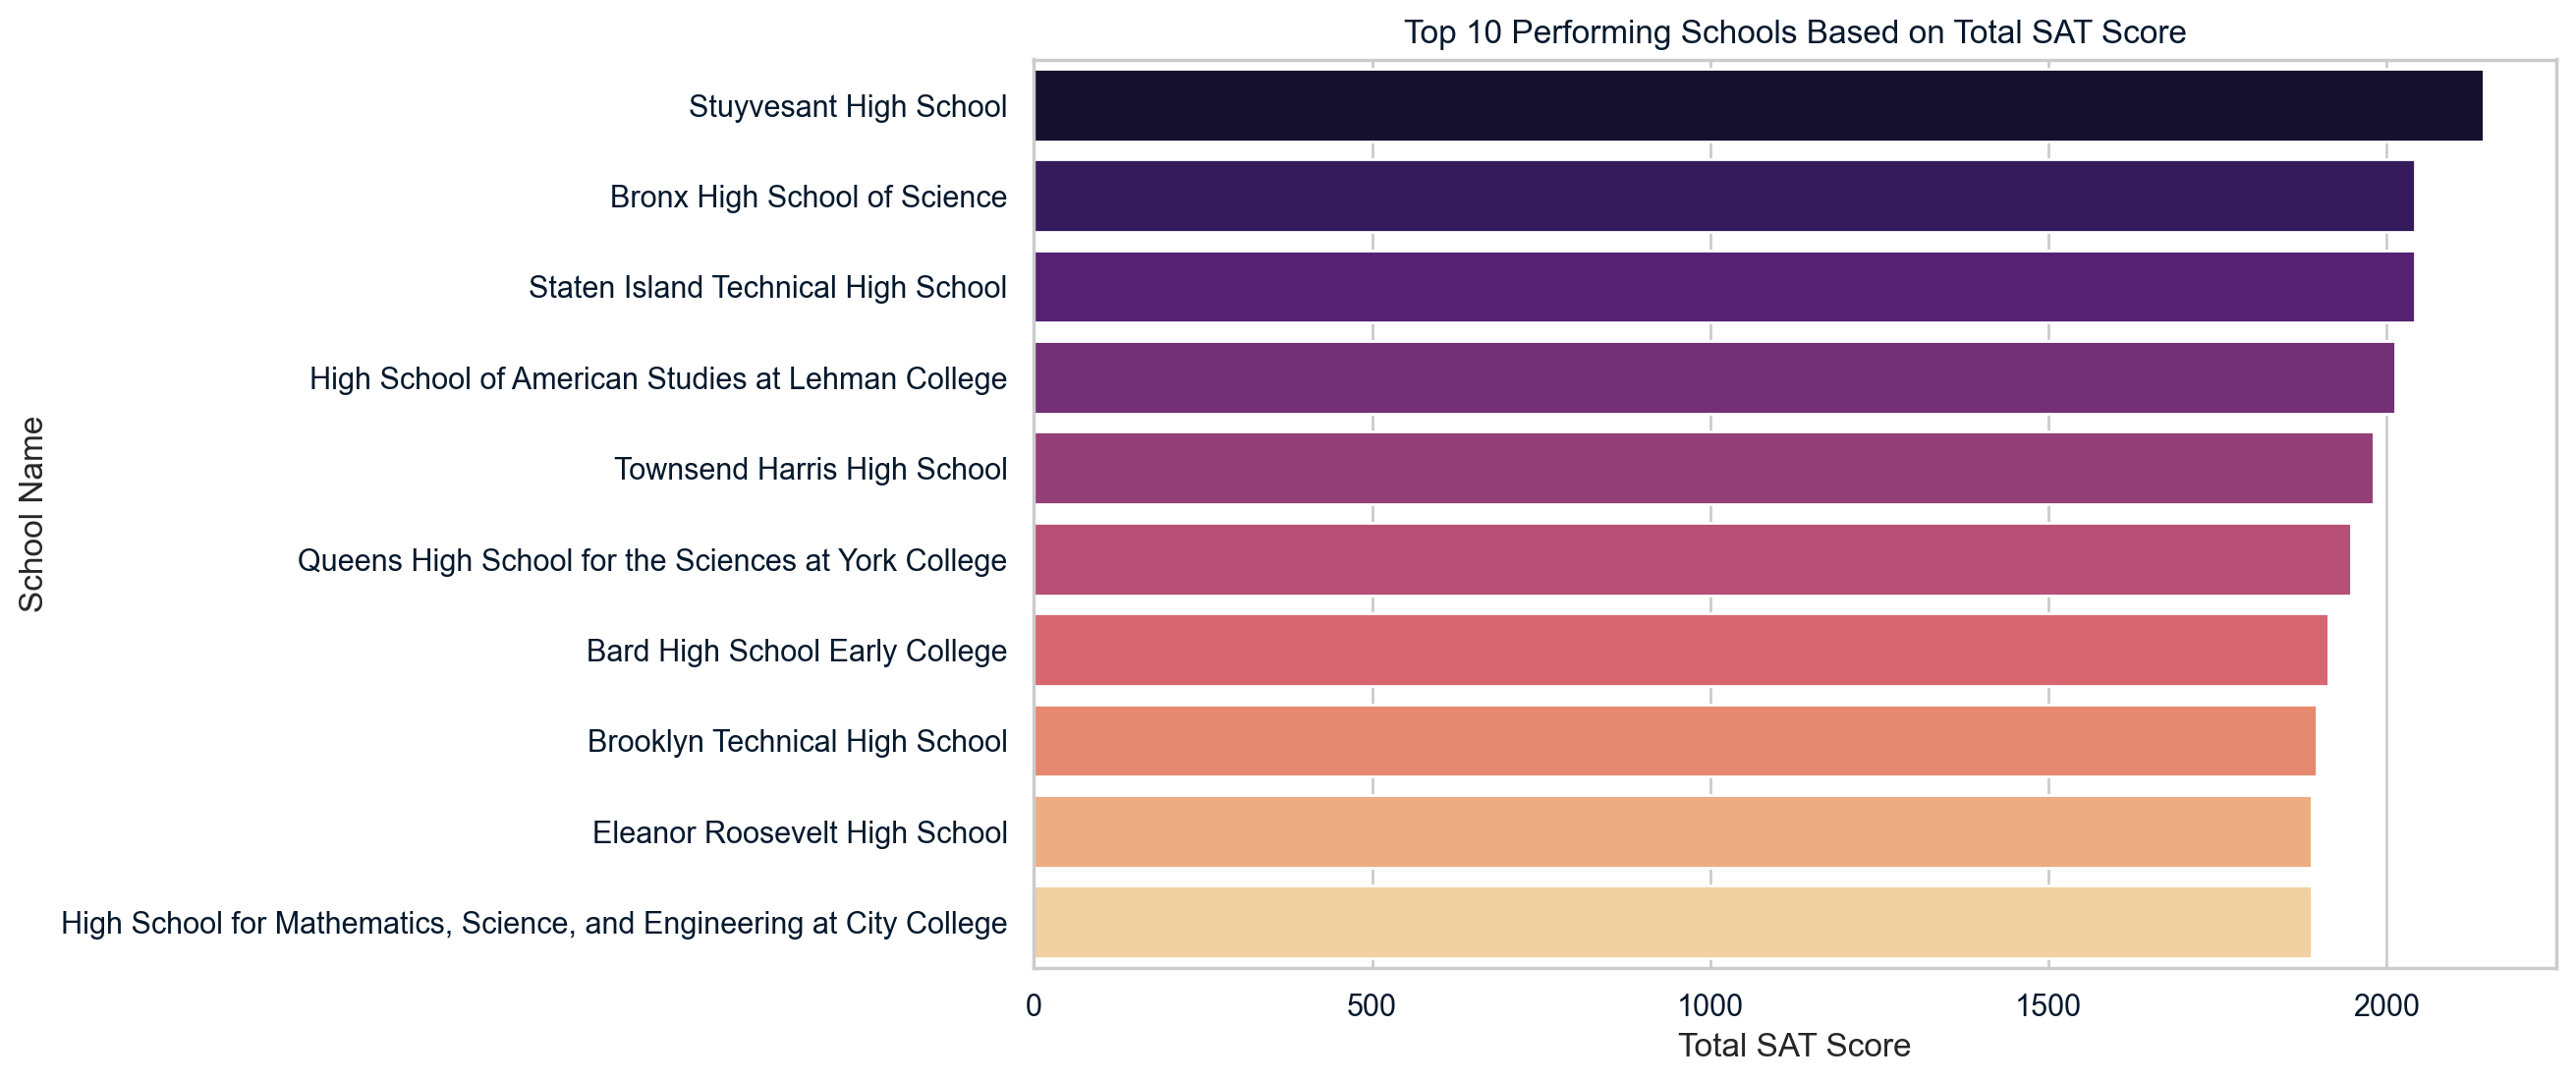

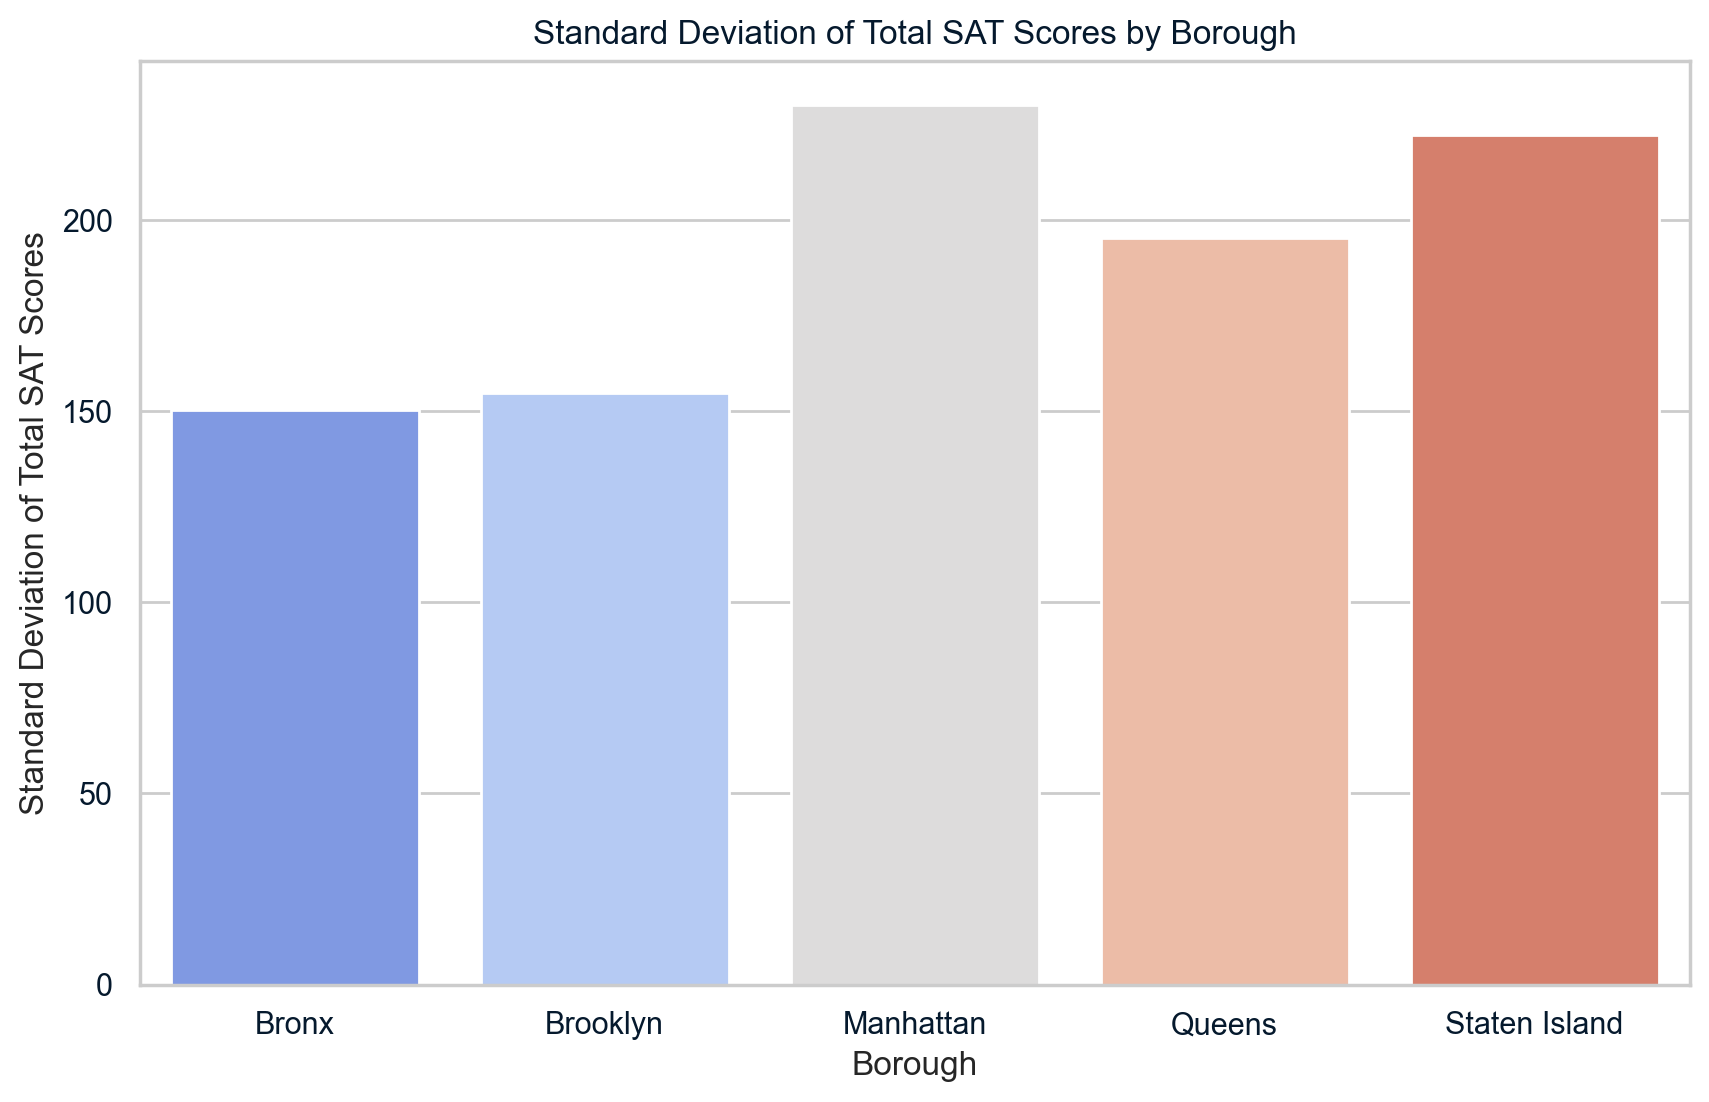

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the data
schools = pd.read_csv("schools.csv")

# Which schools are best for math?
best_math_schools = schools[schools["average_math"] >= 640][["school_name", "average_math"]].sort_values("average_math", ascending=False)

# Calculate total_SAT per school
schools["total_SAT"] = schools["average_math"] + schools["average_reading"] + schools["average_writing"]

# Who are the top 10 performing schools?
top_10_schools = schools.sort_values("total_SAT", ascending=False)[["school_name", "total_SAT"]].head(10)

# Which NYC borough has the highest standard deviation for total_SAT?
boroughs = schools.groupby("borough")["total_SAT"].agg(["count", "mean", "std"]).round(2)

# Filter for max std and make borough a column
largest_std_dev = boroughs[boroughs["std"] == boroughs["std"].max()]

# Rename the columns for clarity
largest_std_dev = largest_std_dev.rename(columns={"count": "num_schools", "mean": "average_SAT", "std": "std_SAT"})

# Prepare data for plotting standard deviation by borough
std_dev_by_borough = boroughs.reset_index().rename(columns={"std": "std_SAT"})

# Set the style for the plots
sns.set(style="whitegrid")

# Plot the best schools for Mathematics
plt.figure(figsize=(10, 6))
sns.barplot(x="average_math", y="school_name", data=best_math_schools, palette="viridis")
plt.title("Best Schools for Mathematics")
plt.xlabel("Average Math Score")
plt.ylabel("School Name")
plt.show()

# Plot the top 10 performing schools based on total SAT score
plt.figure(figsize=(10, 6))
sns.barplot(x="total_SAT", y="school_name", data=top_10_schools, palette="magma")
plt.title("Top 10 Performing Schools Based on Total SAT Score")
plt.xlabel("Total SAT Score")
plt.ylabel("School Name")
plt.show()

# Plot the standard deviation of total SAT scores by borough
plt.figure(figsize=(10, 6))
sns.barplot(x="borough", y="std_SAT", data=std_dev_by_borough, palette="coolwarm")
plt.title("Standard Deviation of Total SAT Scores by Borough")
plt.xlabel("Borough")
plt.ylabel("Standard Deviation of Total SAT Scores")
plt.show()